<a href="https://colab.research.google.com/github/harrisb002/GrainBoundaryDetection/blob/MorphologicalProcesses/GrainBoundaryDetection_Main_Ben.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Previous code written by Soren & JT
---


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# image_generation.py

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image as im

def generatePlots(image_list, file_list):

    for i, image in enumerate(image_list):
        plt.plot(image)
        plt.savefig("plots/" + file_list[i] + "_plot.png")

def generateImages(image_list, file_list):

    for i, data in enumerate(image_list):
        array = np.array(data)
        array = normalize(array)
        image = im.fromarray(array)
        image = image.convert('RGB')
        image.save("/content/drive/MyDrive/Grain Boundary Detection/images/" + file_list[i] + "_image.png")

def normalize_float(array):
    array = array.astype('float64')
    array = array / array.max()
    return array

def normalize(array):
    array = array.astype('float64')
    array = array / array.max()
    array = array * 255
    return array

def get_band_con(file):
    width = file.readline()
    height = file.readline()
    file.readline()

    width = width.split(",")
    width = int(width[1])

    height = height.split(",")
    height = int(height[1])

    band_con = np.zeros((height, width))

    for line in file:
        line = line.split(",")
        band_con[int(line[1])][int(line[0])] = line[2]

    return band_con


def get_phase_color(file, save_image=True):
    file.readline()
    file.readline()

    width = 3523   # hard coded for data file
    height = 2028

    #euler_phase = np.zeros((height, width, 3))      # This one to generate normal image. Next to generate white image.
    euler_phase = np.full((height, width, 3), 255)

    count = 0

    for line in file:
        line = line.split(",")

        rgb = line[4].split()

        y = int(line[1])//10
        x = int(line[2])//10

        rgb = np.array(rgb, "int")

        if (int(line[3]) == 1):
            euler_phase[x,y,:] = rgb
        else:
            euler_phase[x,y,:] = [255,255,255]

    if(save_image):
        image = im.fromarray(euler_phase, mode="RGB")
        #image = image.convert("RGB")
        image.save("/content/drive/MyDrive/Grain Boundary Detection/images/euler_phase_white_all.png")

    return euler_phase


def get_element_images(file):
    file.readline()
    file.readline()

    width = 3523
    height = 2028

    al_image = np.zeros((height, width))
    ca_image = np.zeros((height, width))
    na_image = np.zeros((height, width))
    fe_image = np.zeros((height, width))
    si_image = np.zeros((height, width))
    k_image = np.zeros((height, width))


    for line in file:
        line = line.split(",")

        elements = line[6].split()

        y = int(line[1])//10
        x = int(line[2])//10

        al_image[x,y] = float(elements[0])
        ca_image[x,y] = float(elements[1])
        na_image[x,y] = float(elements[2])
        fe_image[x,y] = float(elements[3])
        si_image[x,y] = float(elements[4])
        k_image[x,y] = float(elements[5])

    image_list = [al_image, ca_image, na_image, fe_image, si_image, k_image]
    file_list = ["al", "ca", "na", "fe", "si", "k"]

    for i, data in enumerate(image_list):
        array = np.array(data)
        array = normalize(array)
        image = im.fromarray(array)
        image = image.convert('RGB')
        image.save("/content/drive/MyDrive/Grain Boundary Detection/images/phase_" + file_list[i] + ".png")

    average_images(image_list)


def average_images(images):
    sum_image = np.zeros((images[0].shape[0], images[0].shape[1]))

    for image in images:
        sum_image += image

    avg_img = sum_image / len(images)

    generateImages([avg_img], ["avg_element"])


def subset_of_euler(file):
    file.readline()
    file.readline()

    width = 300
    height = 300

    euler = np.zeros((height, width, 3))

    for n in range(1000):
        file.readline()

    for i in range(300):
        for j in range(300):
            line = file.readline()
            line = line.split(",")

            rgb = line[4].split()

            y = int(line[1])//10
            x = int(line[2])//10

            euler[i,j,:] = rgb

    euler = normalize(euler)
    image = im.fromarray(euler, "RGB")
    image = image.convert('RGB')
    image.save("/content/drive/MyDrive/Grain Boundary Detection/images/subset_euler_image.png")


def extract_specimen(file):
    file.readline()
    file.readline()

    width = 3523   # hard coded for data file
    height = 2028

    phase = np.zeros((height, width))
    euler = np.zeros((height, width, 3))
    band = np.zeros((height, width))
    al_image = np.zeros((height, width))
    ipf_x = np.zeros((height, width))
    ipf_y = np.zeros((height, width))
    ipf_z = np.zeros((height, width))

    count = 0

    for line in file:
        line = line.split(",")

        rgb = line[4].split()

        y = int(line[1])//10
        x = int(line[2])//10

        element = line[6].split()

        phase[x][y] = int(line[3])

        al_image[x][y] = float(element[0])

        if (rgb[0] == "0" and rgb[1] == "255" and rgb[2] == "0"):
            euler[x][y][0] = 255
            euler[x][y][2] = 255
            euler[x][y][1] = 255
            #count += 1
        else:
            euler[x][y][0] = int(rgb[0])
            euler[x][y][1] = int(rgb[1])
            euler[x][y][2] = int(rgb[2])

        band[x][y] = line[5]

    generateImages([al_image], "phase_al")



def extract_specimen_all(file, verbose=0):
    file.readline()
    file.readline()

    width = 3523   # hard coded for data file
    height = 2028

    phase = np.zeros((height, width))
    band = np.zeros((height, width))
    ipf_x = np.zeros((height, width))
    ipf_y = np.zeros((height, width))
    ipf_z = np.zeros((height, width))



    for line in file:
        line = line.split(",")

        values = line[4].split()

        y = int(line[1])//10
        x = int(line[2])//10

        phase[x][y] = int(line[3])

        ipf_x[x][y] = values[0]
        ipf_y[x][y] = values[1]
        ipf_z[x][y] = values[2]

        band[x][y] = line[5]

    ipf_x = normalize(ipf_x)
    ipf_y = normalize(ipf_y)
    ipf_z = normalize(ipf_z)

    ipf_y = 255 - ipf_y

    ipf_min = all_ipf_min(ipf_x, ipf_y, ipf_z)
    ipf_max = all_ipf_max(ipf_x, ipf_y, ipf_z)

    if(verbose):

        image = im.fromarray(phase)
        image = image.convert('RGB')
        image.save("/content/drive/MyDrive/Grain Boundary Detection/images/original/phase_image.png")

        image = im.fromarray(band)
        image = image.convert('RGB')
        image.save("/content/drive/MyDrive/Grain Boundary Detection/images/original/band_image.png")

        image = im.fromarray(ipf_x)
        image = image.convert('RGB')
        image.save("/content/drive/MyDrive/Grain Boundary Detection/images/original/ipf_x_image.png")

        image = im.fromarray(ipf_y)
        image = image.convert('RGB')
        image.save("/content/drive/MyDrive/Grain Boundary Detection/images/original/ipf_y_image.png")

        image = im.fromarray(ipf_z)
        image = image.convert('RGB')
        image.save("/content/drive/MyDrive/Grain Boundary Detection/images/original/ipf_z_image.png")

        image = im.fromarray(ipf_min)
        image = image.convert('RGB')
        image.save("/content/drive/MyDrive/Grain Boundary Detection/images/original/ipf_min_image.png")

        image = im.fromarray(ipf_max)
        image = image.convert('RGB')
        image.save("/content/drive/MyDrive/Grain Boundary Detection/images/original/ipf_max_image.png")


    return (phase, band, ipf_x, ipf_y, ipf_z, ipf_min, ipf_max)



def get_filter_data(file):
    file.readline()
    file.readline()

    width = 3523   # hard coded for data file
    height = 2028

    phase = np.zeros((height, width))
    band = np.zeros((height, width))

    for line in file:
        line = line.split(",")

        rgb = line[4].split()

        y = int(line[1])//10
        x = int(line[2])//10

        phase[x][y] = int(line[3])

        band[x][y] = line[5]


    return (phase, band)


def all_ipf_nonz(x,y,z):
    ipf = np.zeros((x.shape[0], x.shape[1]))

    ipf[:,:] = x[:,:]

    for i, val in enumerate(y):
        for j, v in enumerate(val):
            if(ipf[i,j] == 0):
                ipf[i,j] = v

    for i, val in enumerate(z):
        for j, v in enumerate(val):
            if(ipf[i,j] == 0):
                ipf[i,j] = v


def all_ipf_max(x,y,z):
    ipf = np.zeros((x.shape[0], x.shape[1]))


    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            ipf[i,j] = max(x[i,j], y[i,j], z[i,j])

    return ipf


def all_ipf_min(x,y,z):
    ipf = np.zeros((x.shape[0], x.shape[1]))


    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            ipf[i,j] = min(x[i,j], y[i,j], z[i,j])

    return ipf


def all_ipf_avg(x,y,z):
    ipf = np.zeros((x.shape[0], x.shape[1]))

    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            ipf[i,j] = (x[i,j] + y[i,j] + z[i,j]) / 3


def ipf_specimen(file):
    file.readline()
    file.readline()

    width = 3523   # hard coded for data file
    height = 2028

    ipf_x = np.zeros((height, width))
    ipf_y = np.zeros((height, width))
    ipf_z = np.zeros((height, width))

    for line in file:
        line = line.split(",")

        values = line[4].split()

        y = int(line[1])//10
        x = int(line[2])//10

        ipf_x[x][y] = values[0]
        ipf_y[x][y] = values[1]
        ipf_z[x][y] = values[2]

    ipf = all_ipf_min(ipf_x,ipf_y,ipf_z)


    return ipf

# filters.py

In [ ]:
from skimage.restoration import denoise_tv_chambolle


def generate_tv(image, filename, weight, verbose=0):
    image = normalize(image)

    cham_image = denoise_tv_chambolle(image, weight=weight)

    if(verbose):
        img = im.fromarray(cham_image)
        img = img.convert('RGB')
        img.save("/content/drive/MyDrive/Grain Boundary Detection/images/tv_images/tv_" + filename + "_" + str(weight) + ".png")

    return cham_image

# tv_filter.py

In [ ]:
import skimage
from skimage.color import label2rgb
import matplotlib.pyplot as plt
import numpy as np
import scipy.ndimage as ndi

def clean_image(arr) -> np.ndarray:
    """clean image through using the median to binary close and fill holes."""
    footprint = skimage.morphology.disk(5)
    masked = arr > skimage.filters.threshold_otsu(arr)
    influence_region = np.ones((5,5))
    step1 = skimage.morphology.binary_dilation(masked, footprint=influence_region)
    step2 = skimage.morphology.binary_erosion(step1, footprint=influence_region)
    step3 = skimage.morphology.binary_erosion(step2, footprint=influence_region)
    step4 = skimage.morphology.binary_dilation(step3, footprint=influence_region)
    image_fill = ndi.binary_fill_holes(step4, skimage.morphology.disk(5))
    return image_fill

def contour_image(arr, save_path=None, overlay_img=False):
    # an (x, y, z) image where z is either 0 or 255 values for the binary image
    cleaned_img = clean_image(arr)
    cleaned_img = ndi.binary_fill_holes(cleaned_img)
    labeled_grains, _ = ndi.label(cleaned_img)
    img_label_overlay = label2rgb(labeled_grains, image=arr, bg_label=0)
    if overlay_img:
        fig, axes = plt.subplots(1,2, figsize=(10,10), sharey=True)
        axes[0].imshow(arr, cmap='gray')
        axes[0].contour(cleaned_img, [0.5], linewidths=0.3, colors='r')
        axes[1].imshow(img_label_overlay)
        for a in axes:
            a.axis('off')
    else:
        plt.figure()
        plt.imshow(arr, cmap='gray')
        plt.contour(cleaned_img, [0.5], linewidths=0.3, colors='r')
    plt.tight_layout()
    if save_path is None:
        plt.savefig('/content/drive/MyDrive/Grain Boundary Detection/images/contour.png', dpi=300)
    else:
        plt.savefig(save_path, dpi=300)

# Main.py

Starting Grain Detection...


<__array_function__ internals>:180: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


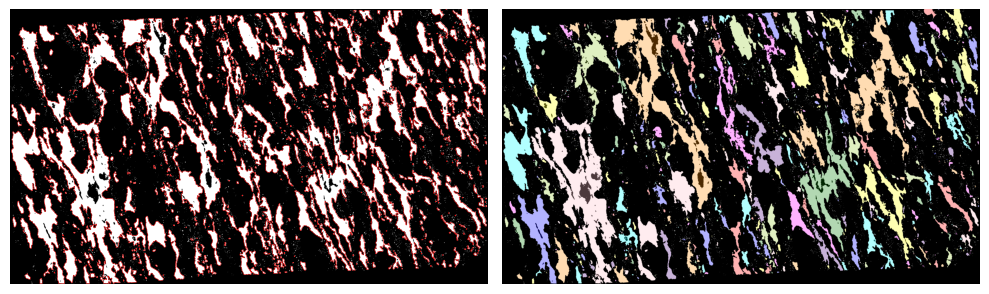

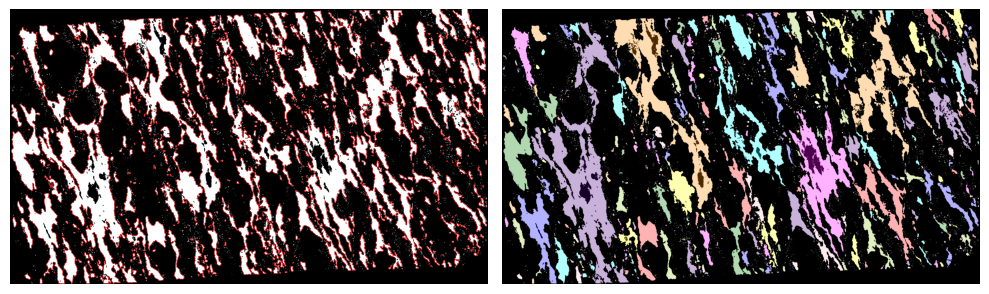

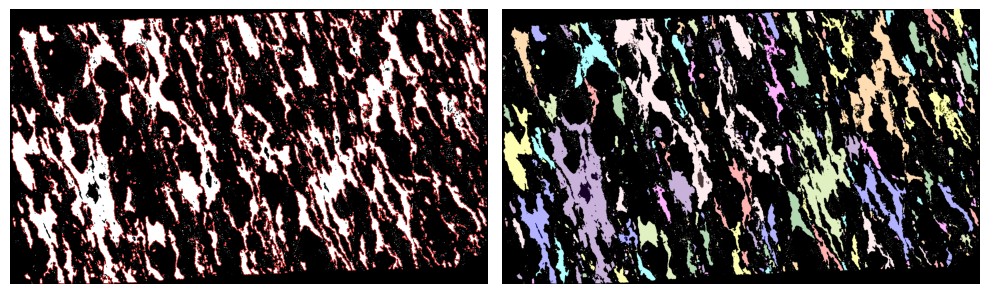

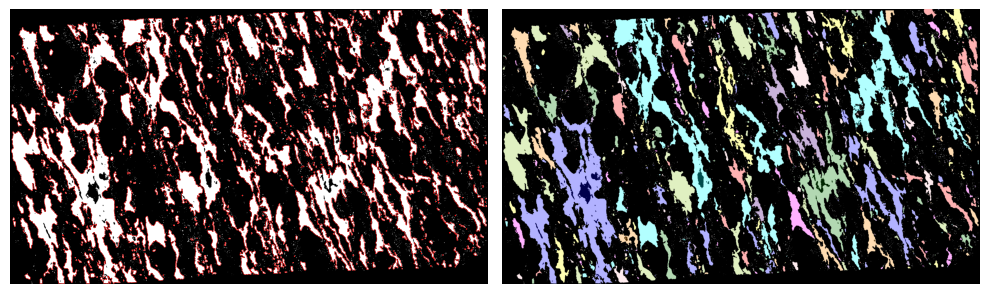

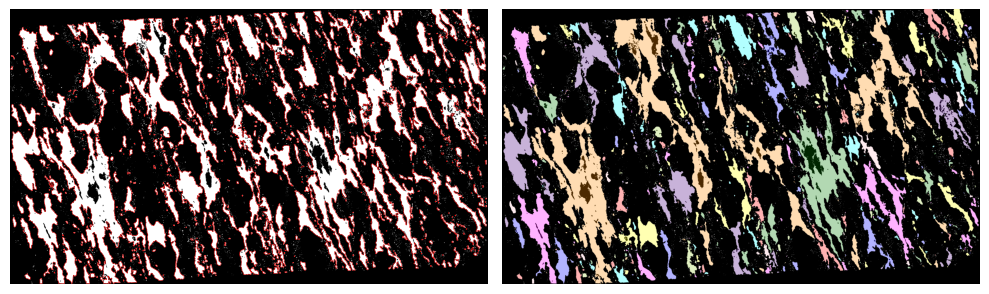

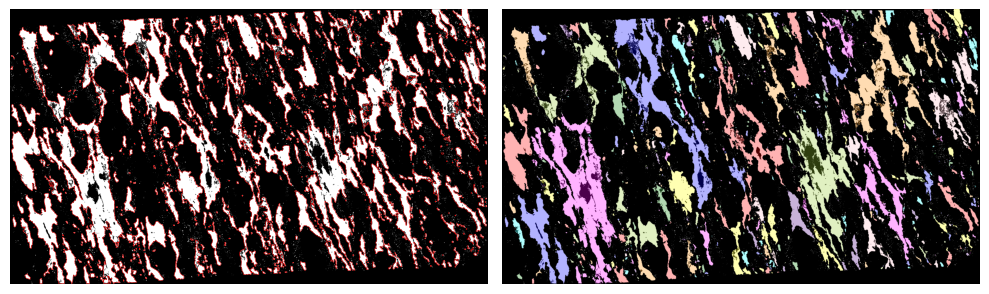

In [ ]:
from PIL import Image as im


def GrainBoundaryDetection(file, weight=10, verbose=0):
    print("Starting Grain Detection...")

    phase, band, ipf_x, ipf_y, ipf_z, ipf_min, ipf_max = extract_specimen_all(file, verbose=verbose)

    ipf_x = generate_tv(ipf_x, "ipf_x", weight, verbose)
    ipf_y = generate_tv(ipf_y, "ipf_y", weight, verbose)
    ipf_z = generate_tv(ipf_z, "ipf_z", weight, verbose)
    ipf_min = generate_tv(ipf_min, "ipf_min", weight, verbose)
    ipf_max = generate_tv(ipf_max, "ipf_max", weight, verbose)
    band = generate_tv(band, "band", weight, verbose)

    threshold = 5

    ipf_x = ipf_x > threshold
    ipf_y = ipf_y > threshold
    ipf_z = ipf_z > threshold
    ipf_min = ipf_min > threshold
    ipf_max = ipf_max > threshold

    #threshold = 75
    #band = band > threshold

    if (verbose):

        #image = im.fromarray(band)
        #image = image.convert('RGB')
        #image.save("images/binary/band_image.png")

        image = im.fromarray(ipf_x)
        image = image.convert('RGB')
        image.save("/content/drive/MyDrive/Grain Boundary Detection/images/binary/ipf_x_image.png")

        image = im.fromarray(ipf_y)
        image = image.convert('RGB')
        image.save("/content/drive/MyDrive/Grain Boundary Detection/images/binary/ipf_y_image.png")

        image = im.fromarray(ipf_z)
        image = image.convert('RGB')
        image.save("/content/drive/MyDrive/Grain Boundary Detection/images/binary/ipf_z_image.png")

        image = im.fromarray(ipf_min)
        image = image.convert('RGB')
        image.save("/content/drive/MyDrive/Grain Boundary Detection/images/binary/ipf_min_image.png")

        image = im.fromarray(ipf_max)
        image = image.convert('RGB')
        image.save("/content/drive/MyDrive/Grain Boundary Detection/images/binary/ipf_max_image.png")


    contour_image(ipf_x, "/content/drive/MyDrive/Grain Boundary Detection/images/contour_ipf_x.png", overlay_img=True)
    contour_image(ipf_y, "/content/drive/MyDrive/Grain Boundary Detection/images/contour_ipf_y.png", overlay_img=True)
    contour_image(ipf_z, "/content/drive/MyDrive/Grain Boundary Detection/images/contour_ipf_z.png", overlay_img=True)
    contour_image(ipf_min, "/content/drive/MyDrive/Grain Boundary Detection/images/contour_ipf_min.png", overlay_img=True)
    contour_image(ipf_max, "/content/drive/MyDrive/Grain Boundary Detection/images/contour_ipf_max.png", overlay_img=True)
    contour_image(phase, "/content/drive/MyDrive/Grain Boundary Detection/images/contour_phase.png", overlay_img=True)


specimen = open(r'/content/drive/MyDrive/Grain Boundary Detection/11CSR01-p Specimen 1 Area 2 Montaged Data 1 Montaged Map Data-Ph + AE + BC + EDS (Al+Ca+Na+Fe+Si+K).csv', 'r')

GrainBoundaryDetection(specimen, weight=10, verbose=1)  # Edit this function. Weight changes TV filter weight, verbose saves images of each step in folders

# Utilizing code from previous class as well to diplay images using defined parameters

In [ ]:
from skimage import img_as_ubyte
from skimage import exposure
from skimage import filters
from skimage import io
from skimage import color
from skimage import feature
from skimage import segmentation
from skimage import morphology
from skimage.filters import try_all_threshold, difference_of_gaussians
import scipy.ndimage as ndi
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:

"""
Parameters
"""
# on/off switch for inline images
SHOW_IMAGES = True
SUBPLOTS_FIGSIZE = (24, 12)

# path to input image
BAND_CONTRAST_IMAGE_FILE = '/content/drive/MyDrive/Grain Boundary Detection/thoubythou_BC.png'
EULER_IMAGE_FILE = '/content/drive/MyDrive/Grain Boundary Detection/thoubythou_euler.png'

# on/off switch for histogram equalization of root_image
EQUALIZE_HIST = True
HIST_BINS = 256

"""
Region Segmentation
"""
# marker placement
NUM_MARKERS = 1000

"""
Edge Segmentation
"""
# canny filter threshold
LOWER_THRESH = 0.21
HIGHER_THRESH = 0.88

# remove small objects minimum object size
OBJ_SIZE = 7

"""
Local Thresholding
"""
# rank order filter box size
RO_DIMENSIONS = 5

# local thresholding block size
LT_BLOCK_SIZE = 23

/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:348: RuntimeWarning: Images with dimensions (M, N, 3) are interpreted as 2D+RGB by default. Use `multichannel=False` to interpret as 3D image with last dimension of length 3.
  return func(*args, **kwargs)


root_image: (1001, 1001, 4) uint8 0 255


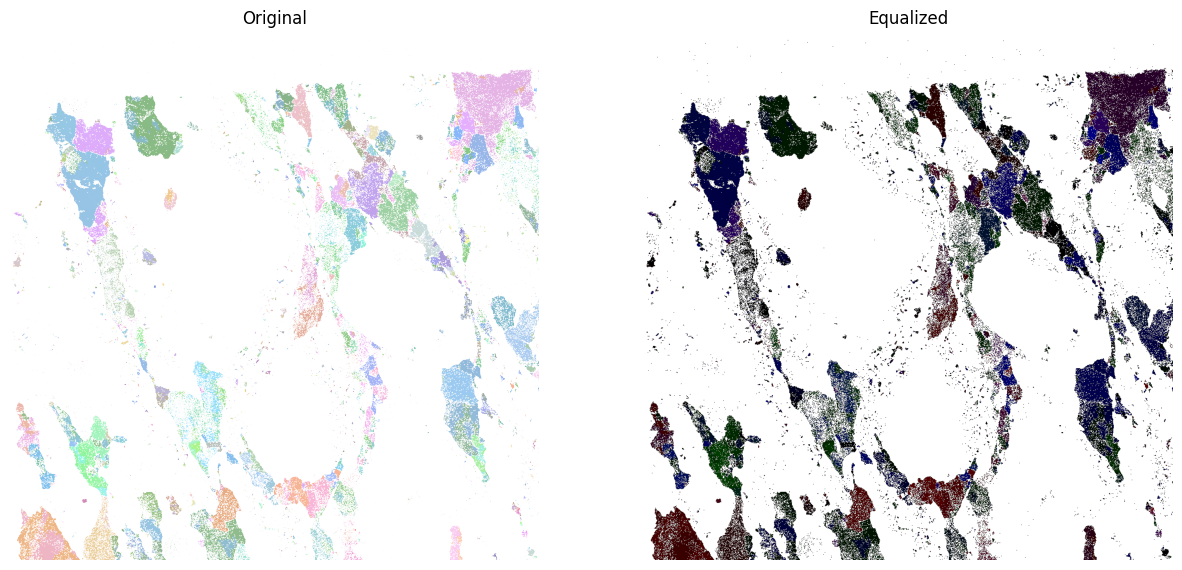

In [ ]:
"""
Initial Image: Band Contrast Image
Optional histogram equalization
skimage.filters.difference_of_gaussians(image, low_sigma, high_sigma=None,
                                        *, mode='nearest', cval=0, channel_axis=None, truncate=4.0)
"""
root_image = io.imread(EULER_IMAGE_FILE)

# if EQUALIZE_HIST:

# Euler image is a RGBA image with shape (1001, 1001, 4)
# Must first separate the alpha channel
alpha_channel = root_image[:, :, 3]

# Process only the RGB channels
rgb_image = root_image[:, :, :3]
ycbcr_image = color.rgb2ycbcr(rgb_image)
ycbcr_image[:, :, 0] = exposure.equalize_hist(ycbcr_image[:, :, 0])  # Apply to luminance channel
equalized_rgb_image = color.ycbcr2rgb(ycbcr_image)

diff_of_gauss = difference_of_gaussians(equalized_rgb_image, low_sigma=1, high_sigma=None)

# Reattach the alpha channel if needed
equalized_rgb_image = np.dstack((equalized_rgb_image, alpha_channel))

print(f"root_image: {root_image.shape} {root_image.dtype} {root_image.min()} {root_image.max()}")

if SHOW_IMAGES:
  fig, axs = plt.subplots(1, 2, figsize=(15,15))

  # Original image
  axs[0].imshow(root_image, cmap='gray')
  axs[0].set_title('Original')
  axs[0].axis('off')

  # Equalized image
  axs[1].imshow(equalized_rgb_image)
  axs[1].set_title('Equalized')
  axs[1].axis('off')

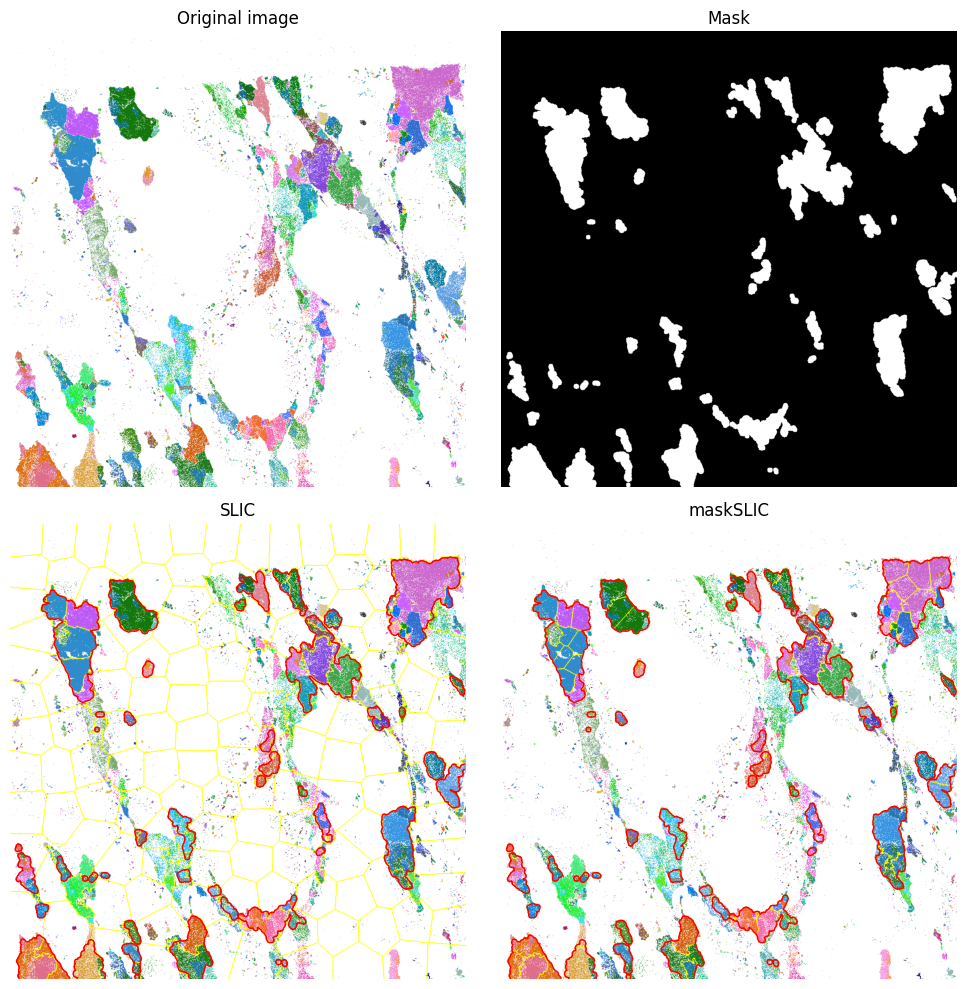

In [ ]:
from skimage import color
from skimage import morphology
from skimage import segmentation


root_image = io.imread(EULER_IMAGE_FILE)

# Compute a mask
rgb_image = root_image[:, :, :3]

lum = color.rgb2gray(rgb_image)
mask = morphology.remove_small_holes( morphology.remove_small_objects(lum < 0.7, 500), 500)

mask = morphology.opening(mask, morphology.disk(5))

# SLIC result
slic = segmentation.slic(rgb_image, n_segments=200, start_label=1)

# maskSLIC result
m_slic = segmentation.slic(rgb_image, n_segments=100, mask=mask, start_label=1)

# Display result
fig, ax_arr = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(10, 10))
ax1, ax2, ax3, ax4 = ax_arr.ravel()

ax1.imshow(rgb_image)
ax1.set_title('Original image')

ax2.imshow(mask, cmap='gray')
ax2.set_title('Mask')

ax3.imshow(segmentation.mark_boundaries(rgb_image, slic))
ax3.contour(mask, colors='red', linewidths=1)
ax3.set_title('SLIC')

ax4.imshow(segmentation.mark_boundaries(rgb_image, m_slic))
ax4.contour(mask, colors='red', linewidths=1)
ax4.set_title('maskSLIC')

for ax in ax_arr.ravel():
    ax.set_axis_off()

plt.tight_layout()
plt.show()

In [ ]:
"""
Sobel Filtering: sobel_filtered
"""

sobel_filtered = filters.sobel(root_image)

print(f"sobel_filtered: {sobel_filtered.shape} {sobel_filtered.dtype}")

if SHOW_IMAGES:
    fig, axs = plt.subplots(1, figsize=SUBPLOTS_FIGSIZE)
    axs.imshow(sobel_filtered)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from skimage import io
from scipy.ndimage import uniform_filter, convolve, median_filter, gaussian_filter
from skimage.restoration import denoise_bilateral

In [ ]:
"""
Initial Image: Band Contrast Image
Optional histogram equalization
"""
# Define a kernel for convolution
kernel = np.ones((5, 5), np.float32) / 25 # (normalize by dividing by 49)

# Apply filters
# Apply the 2D convolution to each channel because it is 3 channeled
red = convolve(root_image[:, :, 0], kernel)
green = convolve(root_image[:, :, 1], kernel)
blue = convolve(root_image[:, :, 2], kernel)

# Stack the filtered channels back into a single three-channel image
filt_2D = np.stack((red, green, blue), axis=-1)

# blur = uniform_filter(root_image, size=5)  # Uniform (mean) blur
# blur_gaussian = gaussian_filter(root_image, sigma=1)  # Gaussian blur
median_blur = median_filter(root_image, size=5)  # Median blur
# bilateral_blur = denoise_bilateral(root_image, sigma_color=0.05, sigma_spatial=15, multichannel=True)  # Bilateral filter
diff_of_gauss = difference_of_gaussians(root_image, sigma=1)

# Display the images using Matplotlib
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

# Original image
axs[0, 0].imshow(root_image, cmap='gray')
axs[0, 0].set_title('Original')
axs[0, 0].axis('off')

# 2D filtered image
axs[0, 1].imshow(filt_2D, cmap='gray')
axs[0, 1].set_title('2D Filtered')
axs[0, 1].axis('off')

# diff_of_gauss image
axs[0, 2].imshow(diff_of_gauss, cmap='gray')
axs[0, 2].set_title('diff_of_gauss')
axs[0, 2].axis('off')

# Gaussian Blur image
# axs[1, 0].imshow(blur_gaussian, cmap='gray')
# axs[1, 0].set_title('Gaussian Blur')
# axs[1, 0].axis('off')

# Median Blur image
# axs[1, 1].imshow(median_blur, cmap='gray')
# axs[1, 1].set_title('Median Blur')
# axs[1, 1].axis('off')

# # Bilateral image
# axs[1, 2].imshow(bilateral_blur, cmap='gray')
# axs[1, 2].set_title('Bilateral')
# axs[1, 2].axis('off')

plt.show()

<ipython-input-26-2f83b15756b2>:20: FutureWarning: `multichannel` is a deprecated argument name for `denoise_bilateral`. It will be removed in version 1.0. Please use `channel_axis` instead.
  bilateral_blur = denoise_bilateral(root_image, sigma_color=0.05, sigma_spatial=15, multichannel=True)  # Bilateral filter


In [ ]:
from skimage import io, exposure, measure, color
from scipy import ndimage
import matplotlib.pyplot as plt

In [ ]:
# # Optional: Apply histogram equalization to enhance contrast
# # equalize_hist = True
# # hist_bins = 256
# # if equalize_hist:
# #     root_image = exposure.equalize_hist(root_image, nbins=hist_bins)

# # Example segmentation using a simple threshold
# # This will need to be adjusted for the actual image content
# threshold = root_image.mean()  # A simple threshold
# binary_image = root_image > threshold

# # Perform morphological operations
# # Define the size for erosion and dilation
# size = 3
# eroded_image = ndimage.binary_erosion(binary_image, structure=np.ones((size, size)))
# dilated_image = ndimage.binary_dilation(eroded_image, structure=np.ones((size, size)))

# # Display the segmented image with morphological operations applied
# fig, axs = plt.subplots(1, 2, figsize=(24, 8))
# axs[0].imshow(binary_image, cmap='gray')
# axs[0].set_title('Thresholded Image')
# axs[0].axis('off')

# axs[1].imshow(eroded_image, cmap='gray')
# axs[1].set_title('Eroded Image')
# axs[1].axis('off')

# plt.show()

RuntimeError: ignored

In [ ]:
# Apply median filter for noise reduction
# median_blur = ndimage.median_filter(root_image, size=5)

# Segmentation using a simple threshold
# This will need to be adjusted for the actual image content
threshold = root_image.mean()  # A simple threshold
binary_image = root_image > threshold

# Perform morphological operations
# Define the size for erosion and dilation
size = 1
eroded_image = ndimage.binary_erosion(binary_image, structure=np.ones((size, size)))
dilated_image = ndimage.binary_dilation(eroded_image, structure=np.ones((size, size)))

# Perform closing operation to fill in the cracks
structure_size_close = 1
closed_image = ndimage.binary_closing(binary_image, structure=np.ones((structure_size_close, structure_size_close)))

# Perform opening operation to smooth the insides of the rocks
structure_size_open = 5
smoothed_image = ndimage.binary_opening(closed_image, structure=np.ones((structure_size_open, structure_size_open)))

# Display the processed images
fig, axs = plt.subplots(1, 2, figsize=(24, 8))
axs[0].imshow(closed_image, cmap='gray')
axs[0].set_title('Closed Image')
axs[0].axis('off')

axs[1].imshow(smoothed_image, cmap='gray')
axs[1].set_title('Smoothed Image')
axs[1].axis('off')

plt.show()

RuntimeError: ignored

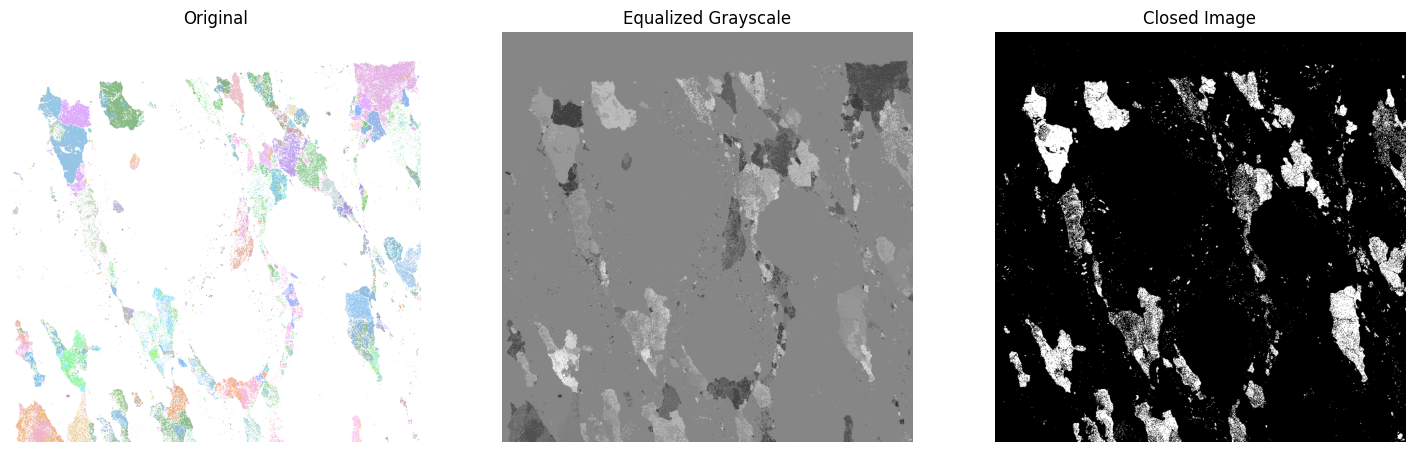

In [ ]:
# Assuming root_image is your RGBA image with shape (1001, 1001, 4)
# Separate the alpha channel
alpha_channel = root_image[:, :, 3]

# Process only the RGB channels
rgb_image = root_image[:, :, :3]
ycbcr_image = color.rgb2ycbcr(rgb_image)
ycbcr_image[:, :, 0] = exposure.equalize_hist(ycbcr_image[:, :, 0])  # Apply to luminance channel
equalized_rgb_image = color.ycbcr2rgb(ycbcr_image)

# Convert the equalized RGB image to grayscale
equalized_gray_image = color.rgb2gray(equalized_rgb_image)

# Thresholding on the equalized grayscale image
threshold = equalized_gray_image.mean()
binary_image = equalized_gray_image > threshold

# Perform morphological operations on the binary image
size = 1
eroded_image = ndimage.binary_erosion(binary_image, structure=np.ones((size, size)))
dilated_image = ndimage.binary_dilation(eroded_image, structure=np.ones((size, size)))

# Perform closing operation to fill in the cracks
structure_size_close = 1
closed_image = ndimage.binary_closing(binary_image, structure=np.ones((structure_size_close, structure_size_close)))

# Perform opening operation to smooth the insides of the rocks
structure_size_open = 5
smoothed_image = ndimage.binary_opening(closed_image, structure=np.ones((structure_size_open, structure_size_open)))

# Display the original, equalized, and processed images
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Original image
axs[0].imshow(root_image)
axs[0].set_title('Original')
axs[0].axis('off')

# Equalized grayscale image
axs[1].imshow(equalized_gray_image, cmap='gray')
axs[1].set_title('Equalized Grayscale')
axs[1].axis('off')

# Closed binary image
axs[2].imshow(closed_image, cmap='gray')
axs[2].set_title('Closed Image')
axs[2].axis('off')

plt.show()

# Using Stardist

In [ ]:
!pip install stardist

In [ ]:
from __future__ import print_function, unicode_literals, absolute_import, division
import sys
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from glob import glob
from tifffile import imread
from tqdm import tqdm
from csbdeep.utils import Path, normalize
from csbdeep.io import save_tiff_imagej_compatible
from stardist import random_label_cmap, _draw_polygons, export_imagej_rois
from stardist.models import StarDist2D
from stardist.plot import render_label
from stardist.data import test_image_nuclei_2d


In [ ]:
# prints a list of available models
StarDist2D.from_pretrained()

In [ ]:
# Define a pretrained model to segment nuclei in fluorescence images (download from pretrained)
model = StarDist2D.from_pretrained('2D_paper_dsb2018')

In [ ]:
# Load the image
image_path = '/content/drive/MyDrive/Grain Boundary Detection/thoubythou_euler.png'
image = io.imread(image_path)

# Crop the top left quarter of the image
cropped_image = image[:300, :300, :]

# Display the cropped image
plt.imshow(cropped_image)
plt.axis('off')  # Turn off axis
plt.show()

# cropped_image now contains the top left quarter of the original image
# You can now save this to a variable or use it as needed
top_left_portion = cropped_image
print(f"Cropped image shape: {top_left_portion.shape}")

In [ ]:
np.random.seed(42)
lbl_cmap = random_label_cmap()